# Symbolic computation of the joint

The three vector $A$, $B$ and $C$ define two jointive segments $AB$ and $BC$. $I$ is the inner point of the intersection of the corridors. $Q$ is a vector which bissect the two segments

In [10]:
UA = {Ax, Ay, Az}
UB = {Bx, By, Bz}
UC = {Cx, Cy, Cz}
UI = {Ix, Iy, Iz}
UQ = {Qx, Qy, Qz}

{Ax, Ay, Az}
{Bx, By, Bz}
{Cx, Cy, Cz}
{Ix, Iy, Iz}
{Qx, Qy, Qz}

$V$ is a vector on the $BQ$ bissector, parametrized by $t$

In [15]:
UV = UB * Cos[t] + UQ * Sin[t]

{Bx Cos[t] + Qx Sin[t], By Cos[t] + Qy Sin[t], Bz Cos[t] + Qz Sin[t]}

$L$ is the projection of V on the segment $AB$

In [16]:
ULZ = Cross[UA, UB] / Sqrt[ Cross[UA, UB].Cross[UA, UB] ] // Simplify;

In [17]:
ULY = Cross[ULZ, UV] / Sqrt[ Cross[ULZ, UV].Cross[ULZ, UV] ] // Simplify;

In [18]:
ULX = Collect[ Cross[ULY, ULZ] // Expand, { Sin[2*t], Cos[2*t], Sin[t], Cos[t]}, Simplify ];

We can compute the value of the angle between $V$ and $L$

2     2     2     2    2     2
Sqrt[((Bx  + By  + Bz ) (Az  (Bx  + By ) - 2 Ax Az Bx Bz - 2 Ay By (Ax Bx + Az Bz) + 
 
            2    2     2      2    2     2         2
>         Ay  (Bx  + Bz ) + Ax  (By  + Bz )) Cos[t]  + 
 
                                                                 2     2
>      (-2 Ax Az (Bx By Qy Qz + By Qx (Bz Qy - By Qz) + Bx Bz (Qx  + Qz )) + 
 
            2    2    2     2                      2    2     2
>         Ax  (By  (Qx  + Qy ) + 2 By Bz Qy Qz + Bz  (Qx  + Qz )) + 
 
            2                    2    2     2      2    2     2
>         Az  (2 Bx By Qx Qy + Bx  (Qx  + Qz ) + By  (Qy  + Qz )) + 
 
            2    2    2     2                      2    2     2
>         Ay  (Bx  (Qx  + Qy ) + 2 Bx Bz Qx Qz + Bz  (Qy  + Qz )) - 
 
                             2     2
>         2 Ay (Ax (Bx By (Qx  + Qy ) + Bx Bz Qy Qz + Bz Qx (-(Bz Qy) + By Qz)) + 
 
                     2                                           2     2           2
>            Az (-(Bx  Qy Qz) + Bx Qx (Bz Qy + By Qz) + By Bz (Qy  + Qz )))) Sin[t]  - 
 
>      2 (Ay Az By Bz + Ax Bx (Ay By + Az Bz)) (Bx Qx + By Qy + Bz Qz) Sin[2 t] + 
 
          2    2     2      2    2     2      2    2     2
>      (Az  (Bx  + By ) + Ay  (Bx  + Bz ) + Ax  (By  + Bz )) (Bx Qx + By Qy + Bz Qz) 
 
>       Sin[2 t]) / 
 
        2    2     2                                                2    2     2
>    (Az  (Bx  + By ) - 2 Ax Az Bx Bz - 2 Ay By (Ax Bx + Az Bz) + Ay  (Bx  + Bz ) + 
 
         2    2     2
>      Ax  (By  + Bz ))]
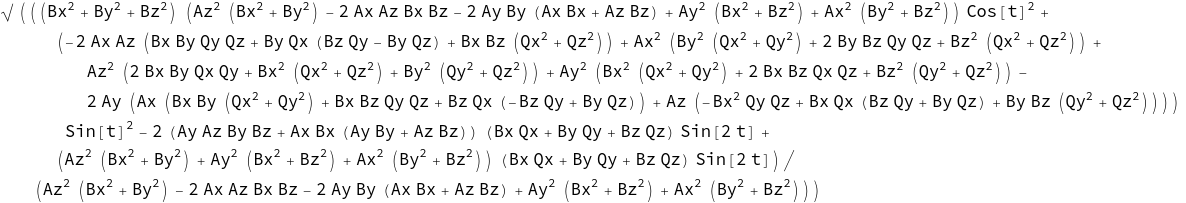

In [19]:
LeftArcP = (ULX.UV) // Expand // Simplify

And make some simplification assuming:

* $B$ is a unit vector
* $B$ is perpendicular to $Q$ (by construction)

2                           2       2
Sqrt[Cos[t]  - ((Ax Qx + Ay Qy + Az Qz)  Sin[t] ) / 
 
         2         2                                                2         2
>     (Ay  (-1 + By ) + 2 Ax Az Bx Bz + 2 Ay By (Ax Bx + Az Bz) + Az  (-1 + Bz ) - 
 
          2    2     2
>       Ax  (By  + Bz ))]
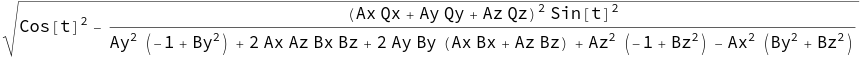

In [20]:
LeftArc = Assuming[
    Bx^2+By^2+Bz^2 == 1,
Assuming[
    Bx*Qx+By*Qy+Bz*Qz == 0,
    Collect[ LeftArcP, { Sin[2*t], Cos[2*t], Sin[t], Cos[t]}, FullSimplify ]
]]

{P1 -> Ix Qx + Iy Qy + Iz Qz, P2 -> Bx Ix + By Iy + Bz Iz, 
 
                                   2
>   R1 -> -((Ax Qx + Ay Qy + Az Qz)  / 
 
           2         2                                                2         2
>       (Ay  (-1 + By ) + 2 Ax Az Bx Bz + 2 Ay By (Ax Bx + Az Bz) + Az  (-1 + Bz ) - 
 
            2    2     2
>         Ax  (By  + Bz )))}
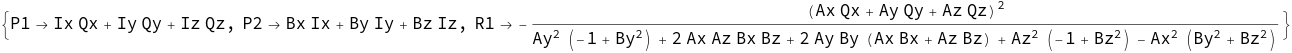

In [21]:
sub = {
    P1 -> (Ix*Qx + Iy*Qy + Iz*Qz),
    P2 -> (Ix*Bx + Iy*By + Iz*Bz),
    R1 -> -(Ax*Qx + Ay*Qy + Az*Qz)^2 / (Ay^2*(-1+By^2) + 2*Ax*Az*Bx*Bz + 2*Ay*By*(Ax*Bx+Az*Bz) +Az^2*(-1+Bz^2) - Ax^2*(By^2+Bz^2))
}

In [22]:
LeftEqua = Sqrt[ R1 + (1 - R1)*Cos[t]^2 ]

2
Sqrt[R1 + (1 - R1) Cos[t] ]

In [23]:
CentEqua = P1 * Sin[t] + P2 * Cos[t]

P2 Cos[t] + P1 Sin[t]

In [24]:
resEqua = Solve[ LeftEqua == CentEqua, t ];

Inverse functions are being used by `1`, so some solutions may not be found; use Reduce for complete solution information.: Inverse functions are being used by Solve, so some solutions may not be found; use Reduce for complete solution information.

2      2
ArcCos[Sqrt[(P1  - R1)  / 
 
         4     2        2                      2
>     (P1  + P1  (1 + P2  - 2 R1) + R1 (-1 + P2  + R1) + 
 
                 2   2    2           2
>       2 Sqrt[P1  P2  (P1  + (-1 + P2 ) R1)])]]
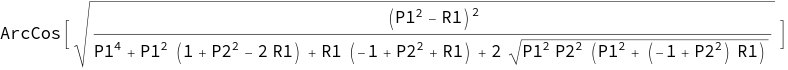

In [25]:
tsol = t /. resEqua[[4]] // FullSimplify

In [ ]:
tsol = (t /. resEqua[[4]] /. sub) // FullSimplify

{Ax -> 0.794252, Ay -> 0.426305, Az -> -0.432929, Bx -> 0.444457, By -> 0.339994, 
 
>   Bz -> 0.828772, Ix -> 0.483165, Iy -> 0.46892, Iz -> 0.739368, Qx -> 0.246611, 
 
>   Qy -> 0.842985, Qz -> -0.478078}
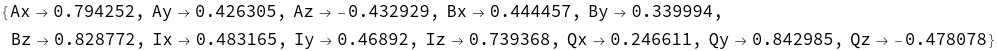

In [31]:
val = {
	Ax -> 0.794251719609759,
	Ay -> 0.426305460744861,
	Az -> -0.4329293938231181,
	Bx -> 0.4444565318238356,
	By -> 0.3399936715573496,
	Bz -> 0.8287717988807781,
	Ix -> 0.48316498890057236,
	Iy -> 0.4689201800947046,
	Iz -> 0.7393682831990155,
	Qx -> 0.24661112454861925,
	Qy -> 0.8429853628065601,
	Qz -> -0.47807805988432217
}

In [32]:
tsol /. sub /. val

0.432506

In [34]:
sub /. val

{P1 -> 0.160971, P2 -> 0.986943, R1 -> 0.592443}